# DataCarma: Колёса судьбы



Кратко о сути проекта: в поисках лучшего датасета мы 69 дней и ночей скитались по сайтам разным и в результате нашли её - гибддшную выкладку по ДТП (частично есть за 2025 год, но мы решили взять полную за 2015-2024 года). Какая информация там есть? Вполне себе интересная: от долготы и широты иницидента, до состояния здоровья пассажира (понятно, что базовая инфа время ~~встречи изменить нельзя~~ дтп, город, марка траснпорта, стаж водителя и тд там тоже имеется)

Теперь по датасету у нас есть две таблички: 
1. accidents
2. vehicles
   
Их мы джоиним и получаем итоговую таблоиду для изучения 

Чуть конкретнее по структуре:
- accidents:
  * id - хеджхогу понятно - int
  * tags - Тип ДТП по наличию пострадавших пешеходов и детей - str
  * category - Категория ДТП, например «Наезд на пешехода» и «Опрокидывание» - str
  * region - Регион, в котором произошло ДТП - str
  * county - Город или район - str
  * longitude - Долгота - float
  * latitude - Широта - float 
  * nearby - Объекты, которые находятся вблизи - str
  * datetime - Дата и время ДТП - str
  * light - Nаличие дневного и искусственного sveta (sharaut) - str
  * weather - Погодные условия, например «Ясно, ~~Понятно~~ Ураганный ветер», «Снегопад, Туман» - str
  * road_conditions - Состояние дорожного покрытия - str
  * participants_count - Количество участников ДТП - int
  * participant_categories - Категории участников ДТП, например «Пешеходы», «Велосипедисты», «Дети» - str
  * severity - Тяжесть ДТП по степени вреда здоровью («Легкий», «Тяжёлый», «С погибшими») - str
  * dead_count - Количество погибших в ДТП - int
  * injured_count - Количество раненных в ДТП - int
- vehicles:
  * accident_id - id ДТП, используется для связи с accidents и vehicles - int
  * vehicle_id - id vehicle, используется для связи с таблицей об участниках ДТП (participants) - но мы ее пока решили не трогать, так что неактуально - int
  * category - Категория транспортного средства - str
  * brand - Марка поло транспортного средства - str
  * model - Модель транспортного средства - str
  * color - Цвет транспортного средства (зеленоглазого такси)- str
  * year - Год производства транспортного средства - int
  
А после джоин~~т~~а мы ходим выводить:
 * accident_id
 * accident_category
 * weather
 * road_conditions
 * participants_count
 * severity
 * dead_count
 * injured_count
 * vehicle_category
 * brand
 * model
 * color
 * year

Вот такие пироги

# Твои слова - кодица:

раз доллар упал, бегом импортировать:

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 50)
pd.set_option('display.float_format',  '{:.2f}'.format)
pd.set_option('display.max_colwidth', 30)

In [236]:
# Пути к файлам с данными
data_path = "data/"
accidents_file = data_path + "accidents.csv"
vehicles_file = data_path + "vehicles.csv"

# Загрузка данных
accidents = pd.read_csv(accidents_file, sep=";", encoding="utf-8")
print("чуть инфы про дтпшки")
accidents.info()
accidents.isnull().sum()
accidents.describe().T
accidents.nunique()
accidents['accident_year'] = pd.to_datetime(accidents['datetime']).dt.year
accidents = accidents.rename(columns={'id': 'accident_id'})

accidents

чуть инфы про дтпшки
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440208 entries, 0 to 1440207
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1440208 non-null  int64  
 1   tags                    1440208 non-null  object 
 2   category                1440208 non-null  object 
 3   region                  1440208 non-null  object 
 4   county                  1440208 non-null  object 
 5   address                 1370911 non-null  object 
 6   longitude               1429464 non-null  float64
 7   latitude                1429464 non-null  float64
 8   nearby                  1082922 non-null  object 
 9   datetime                1440208 non-null  object 
 10  light                   1440208 non-null  object 
 11  weather                 1440208 non-null  object 
 12  road_conditions         1440208 non-null  object 
 13  participants_count      1440208 non-

,accident_id,tags,category,region,county,address,longitude,latitude,nearby,datetime,light,weather,road_conditions,participants_count,participant_categories,severity,dead_count,injured_count,accident_year
0,2869171,Дорожно-транспортные проис...,Наезд на пешехода,Алтайский край,Барнаул,NaN,83.79,53.39,Жилые дома индивидуальной ...,2023-05-24 19:30:00,Светлое время суток,Ясно,Сухое,2,"Все участники, Пешеходы, М...",Легкий,0,1,2023
1,2320091,Дорожно-транспортные проис...,Иной вид ДТП,Алтайский край,Барнаул,"г Барнаул, ул Сиреневая, 11",83.67,53.35,Многоквартирные жилые дома...,2015-09-16 13:00:00,Светлое время суток,Пасмурно,Сухое,2,"Дети, Все участники",Легкий,0,1,2015
2,2321011,Дорожно-транспортные проис...,Падение пассажира,Алтайский край,Барнаул,"г Барнаул, ул Попова, 165",83.40,53.20,"Административные здания, О...",2017-08-25 15:30:00,Светлое время суток,Ясно,Сухое,3,"Дети, Все участники",Легкий,0,1,2017
3,2576909,Дорожно-транспортные проис...,Столкновение,Алтайский край,Барнаул,"г Барнаул, ул Петра Сухова...",83.71,53.38,Выезд с прилегающей террит...,2021-05-29 19:40:00,Светлое время суток,Ясно,"Сухое, Отсутствие, плохая ...",3,"Мотоциклисты, Все участники",Тяжёлый,0,1,2021
4,2547743,Дорожно-транспортные проис...,Столкновение,Алтайский край,Барнаул,"г Барнаул, Объездная дорог...",83.71,53.29,"Эстакада, путепровод",2021-02-22 13:50:00,Светлое время суток,Ясно,Обработанное противогололе...,4,Все участники,Тяжёлый,0,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440203,2376263,Дорожно-транспортные проис...,Наезд на препятствие,Забайкальский край,пос. Горный,"п Горный, МЕСТНЫЕ ДОРОГИ, ...",113.02,51.56,NaN,2019-11-11 07:10:00,Светлое время суток,Ясно,Недостатки зимнего содержа...,1,Все участники,Легкий,0,1,2019
1440204,2376542,Дорожно-транспортные проис...,Наезд на препятствие,Забайкальский край,пос. Горный,"п Горный, МЕСТНЫЕ ДОРОГИ, ...",113.02,51.55,Нерегулируемый перекрёсток,2016-12-16 06:30:00,"В темное время суток, осве...",Ясно,Сухое,3,Все участники,Легкий,0,3,2016
1440205,2377463,Дорожно-транспортные проис...,Съезд с дороги,Забайкальский край,пос. Горный,"ГОРНЫЙ - ГОРНЫЙ 1, 1 км",112.89,51.40,Нерегулируемый перекрёсток...,2015-09-27 20:35:00,"В темное время суток, осве...",Пасмурно,Сухое,2,Все участники,Тяжёлый,0,2,2015
1440206,2381588,Дорожно-транспортные проис...,Наезд на велосипедиста,Забайкальский край,пос. Горный,"п Горный, МЕСТНЫЕ ДОРОГИ, ...",113.04,51.55,Многоквартирные жилые дома,2019-07-08 19:30:00,Светлое время суток,Пасмурно,Мокрое,2,"Велосипедисты, Дети, Все у...",Легкий,0,1,2019


Дальше я сразу попробую посмотреть на структуру датасета "сверху" чтобы понять че у нас вообще есть и что можно анализировать

*дико проорал с Наезд на лицо*

In [238]:
accidents["category"].value_counts()

category
Столкновение                                                                                                             614131
Наезд на пешехода                                                                                                        412343
Опрокидывание                                                                                                             87481
Съезд с дороги                                                                                                            87126
Наезд на препятствие                                                                                                      85894
Наезд на велосипедиста                                                                                                    47706
Падение пассажира                                                                                                         46303
Наезд на стоящее ТС                                                                            

In [239]:
accidents["region"].value_counts()

region
Москва                          82314
Краснодарский край              60144
Санкт-Петербург                 53003
Московская область              51962
Нижегородская область           47132
                                ...  
Магаданская область              2214
Еврейская автономная область     2054
Республика Ингушетия             1891
Ненецкий автономный округ         284
Чукотский автономный округ        223
Name: count, Length: 85, dtype: int64

In [240]:
accidents["participants_count"].value_counts()

participants_count
2     818389
3     306302
1     133099
4     109852
5      41865
6      16558
7       6826
8       3033
9       1529
10       821
11       500
12       343
13       243
14       169
15       117
16       103
17        88
18        64
20        53
19        40
21        30
22        25
24        20
25        17
26        15
23        14
30        10
27        10
28         9
33         5
36         5
29         5
38         5
37         4
35         4
39         3
48         3
31         3
40         3
51         3
34         3
45         2
44         2
42         2
32         2
58         1
52         1
43         1
47         1
55         1
53         1
41         1
59         1
50         1
54         1
Name: count, dtype: int64

In [241]:
# глянем датасет с вихиклами

vehicles = pd.read_csv(vehicles_file, sep=";", encoding="utf-8")
print("и еще немного про вехиклы")
vehicles.info()
vehicles.isnull().sum()
vehicles.nunique()
vehicles.describe().T
vehicles

и еще немного про вехиклы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273037 entries, 0 to 2273036
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   accident_id  int64  
 1   vehicle_id   object 
 2   category     object 
 3   brand        object 
 4   model        object 
 5   color        object 
 6   year         float64
dtypes: float64(1), int64(1), object(5)
memory usage: 121.4+ MB


,accident_id,vehicle_id,category,brand,model,color,year
0,2869171,2869171_1,Мопеды с двигателем внутре...,Прочие марки ТС,Прочие марки и модели ТС,Черный,2015.00
1,2320091,2320091_1,"С-класс (малый средний, ко...",TOYOTA,Corolla,Серый,2002.00
2,2321011,2321011_1,Одноэтажные длиной от 8 до...,DAIMLER,Прочие модели DAIMLER,Многоцветный,1981.00
3,2576909,2576909_1,"В-класс (малый) до 3,9 м",HONDA,Torneo,Серый,2001.00
4,2576909,2576909_2,Мотоциклы,HONDA,Magna,Синий,1987.00
...,...,...,...,...,...,...,...
2273032,2376542,2376542_1,"С-класс (малый средний, ко...",TOYOTA,Ipsum,Многоцветный,1988.00
2273033,2377463,2377463_1,Минивэны и универсалы повы...,УАЗ,Прочие модели УАЗ,Иные цвета,2001.00
2273034,2381588,2381588_1,"В-класс (малый) до 3,9 м",TOYOTA,Land Cruiser,Серый,2004.00
2273035,2381588,2381588_2,Велосипеды,NaN,NaN,NaN,NaN


In [276]:
#чуть shaman-им с именами, чтоб джоин сджоинился
accidents = accidents.rename(columns={"id": "accident_id", "category": "accident_category"})
vehicles = vehicles.rename(columns={"category": "vehicle_category"})

accidents.columns = accidents.columns.str.strip().str.lower()
vehicles.columns = vehicles.columns.str.strip().str.lower()
accidents["accident_id"] = accidents["accident_id"].astype(str)
vehicles["accident_id"] = vehicles["accident_id"].astype(str)

# Объединение данных и вывод полезных нам колонок
final_df = accidents.merge(vehicles, on="accident_id", how="left")
final_df = final_df[['accident_id', 'accident_category', 'datetime', 'weather', 'road_conditions', 'participants_count',
                     'severity', 'dead_count', 'injured_count', 'vehicle_category', 'brand', 
                     'model', 'color', 'year']]

# Сохраняем итоговый датасет и принтуем
print("и вот финальное чудо-юдо:")
final_df.to_csv(data_path + "final_dataset.csv", index=False)
final_df

и вот финальное чудо-юдо:


,accident_id,accident_category,datetime,weather,road_conditions,participants_count,severity,dead_count,injured_count,vehicle_category,brand,model,color,year
0,2869171,Наезд на пешехода,2023-05-24 19:30:00,Ясно,Сухое,2,Легкий,0,1,Мопеды с двигателем внутре...,Прочие марки ТС,Прочие марки и модели ТС,Черный,2015.00
1,2320091,Иной вид ДТП,2015-09-16 13:00:00,Пасмурно,Сухое,2,Легкий,0,1,"С-класс (малый средний, ко...",TOYOTA,Corolla,Серый,2002.00
2,2321011,Падение пассажира,2017-08-25 15:30:00,Ясно,Сухое,3,Легкий,0,1,Одноэтажные длиной от 8 до...,DAIMLER,Прочие модели DAIMLER,Многоцветный,1981.00
3,2576909,Столкновение,2021-05-29 19:40:00,Ясно,"Сухое, Отсутствие, плохая ...",3,Тяжёлый,0,1,"В-класс (малый) до 3,9 м",HONDA,Torneo,Серый,2001.00
4,2576909,Столкновение,2021-05-29 19:40:00,Ясно,"Сухое, Отсутствие, плохая ...",3,Тяжёлый,0,1,Мотоциклы,HONDA,Magna,Синий,1987.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286093,2376542,Наезд на препятствие,2016-12-16 06:30:00,Ясно,Сухое,3,Легкий,0,3,"С-класс (малый средний, ко...",TOYOTA,Ipsum,Многоцветный,1988.00
2286094,2377463,Съезд с дороги,2015-09-27 20:35:00,Пасмурно,Сухое,2,Тяжёлый,0,2,Минивэны и универсалы повы...,УАЗ,Прочие модели УАЗ,Иные цвета,2001.00
2286095,2381588,Наезд на велосипедиста,2019-07-08 19:30:00,Пасмурно,Мокрое,2,Легкий,0,1,"В-класс (малый) до 3,9 м",TOYOTA,Land Cruiser,Серый,2004.00
2286096,2381588,Наезд на велосипедиста,2019-07-08 19:30:00,Пасмурно,Мокрое,2,Легкий,0,1,Велосипеды,NaN,NaN,NaN,NaN


#### Чуть чуть про то что получилось:
- итоговый датасет оч круто дополнила инфа о транспорте поскольку можно убрать отсюда всяких велосипедиков, они явно тут лишние
- можно заметить что некоторые аксидентс айди у разных строк одинаковые - они описывают по сути один инцидент, но с разных point of view
- ну и вроде у нас есть вся основная инфа позволяющая оценить че как куда кого, можно посмотреть на графики рисунки картинки

# First view visualization - чикс сюда чиназес и далее по списку

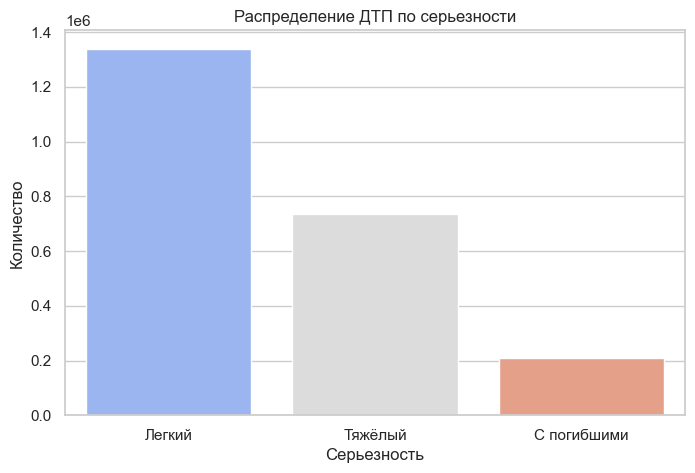

In [245]:
# Устанавливаем стиль графиков
sns.set_theme(style="whitegrid")

# Функция для группировки редких значений в "Другие"
def get_top_n_categories(df, column, n=10):
    top_n = df[column].value_counts().nlargest(n).index
    df[column] = df[column].apply(lambda x: x if x in top_n else "Другие")
    return df

# Ограничиваем топ категорий транспорта и погодных условий
final_df = get_top_n_categories(final_df, "vehicle_category", 10)
final_df = get_top_n_categories(final_df, "weather", 5)

# Визуализация серьезности ДТП
plt.figure(figsize=(8, 5))
sns.countplot(data=final_df, x="severity", order=final_df["severity"].value_counts().index, palette="coolwarm")
plt.title("Распределение ДТП по серьезности")
plt.xlabel("Серьезность")
plt.ylabel("Количество")
plt.show()

# Влияние погоды на серьезность аварий
plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, x="weather", hue="severity", palette="viridis")
plt.title("Влияние погодных условий на серьезность ДТП")
plt.xlabel("Погодные условия")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.legend(title="Серьезность")
plt.show()

## Немного поshamanим с этим графиком
* Хочу сделать так чтобы график отвечал на вопрос: "А вот в рамках одной погоды какое распределение в процентах у каждой серьезности? Ну то есть сколько процентов летальных исходов от общего числа ДТП при ясной, пасмурной и снегопадовой погоде?


In [250]:
import plotly.express as px

# заведем отдельный df_count для подсчета персентажА. Группируем по погоде и выживаемости, потом суммируем и берем процент.
final_df['count'] = 1
df_count = final_df.groupby(['weather', 'severity'], as_index=False)['count'].count()
df_count['total'] = df_count.groupby('weather')['count'].transform('sum')
df_count['percentage'] = df_count['count'] / df_count['total'] * 100
df_count = df_count[df_count['weather'] != 'Другие']
df_count = df_count[df_count['weather'] != 'Пасмурно, Снегопад']
df_count

,weather,severity,count,total,percentage
0,Дождь,Легкий,51221,96636,53.00
1,Дождь,С погибшими,10793,96636,11.17
2,Дождь,Тяжёлый,34622,96636,35.83
6,Пасмурно,Легкий,418164,690431,60.57
7,Пасмурно,С погибшими,60985,690431,8.83
8,Пасмурно,Тяжёлый,211282,690431,30.60
12,Снегопад,Легкий,49191,86746,56.71
13,Снегопад,С погибшими,9577,86746,11.04
14,Снегопад,Тяжёлый,27978,86746,32.25
15,Ясно,Легкий,791387,1351199,58.57


### плиз обратите внимание тут щас будет интерактивный график, он на гитхабе не отображается, поэтому придется открыть колабу или че то такое(

In [252]:
fig = px.bar(
    df_count,
    x='weather',        
    y='percentage',     
    color='severity',  
    barmode='group',
    hover_data=['count', 'total','severity'],
    labels={
        'weather': 'Погода',
        'percentage': 'Процент',
        'severity': 'Серьёзность'
    },
    title='Влияние погодных условий на серьёзность ДТП (интерактивное)'
)

fig.update_traces(
    hovertemplate=
        'Погода: %{x}<br>' +
        'Серьёзность: %{customdata[2]}<br>' +
        'Процент: %{y:.1f}%<br>' +
        'ДТП серьёзности %{customdata[2]}: %{customdata[0]}<br>'
        'Всего ДТП: %{customdata[1]}<br>' +
        '<extra></extra>'
)
fig.show()

Мда.
Кажется стоит лучше проверить насколько влияет погода. Погода получается влияет, но не так сильно как я думал.

- При дожде процент летальных исходов самый высокий - 11,2% VS 8,8% при пасмурной погоде.
- От ясности к ~~понятности~~ дождю легких исходов стало меньше на 5,6%, они распределились на тяжелые и летальные.
- При снегопаде тяжесть исхода ДТП увеличивается слабее, чем при дожде (относительно ясности). Фул хз почему так происходит, может потому что при снегопаде труднее разогнаться до той скорости на которй можно шлепнуться хорошенько до смерти.

Окей, пожалуй от гипотезы влияния погоды я откажусь, поскольку тут крайне трудно оценить и на первый взгляд нет каких то жестких различий.


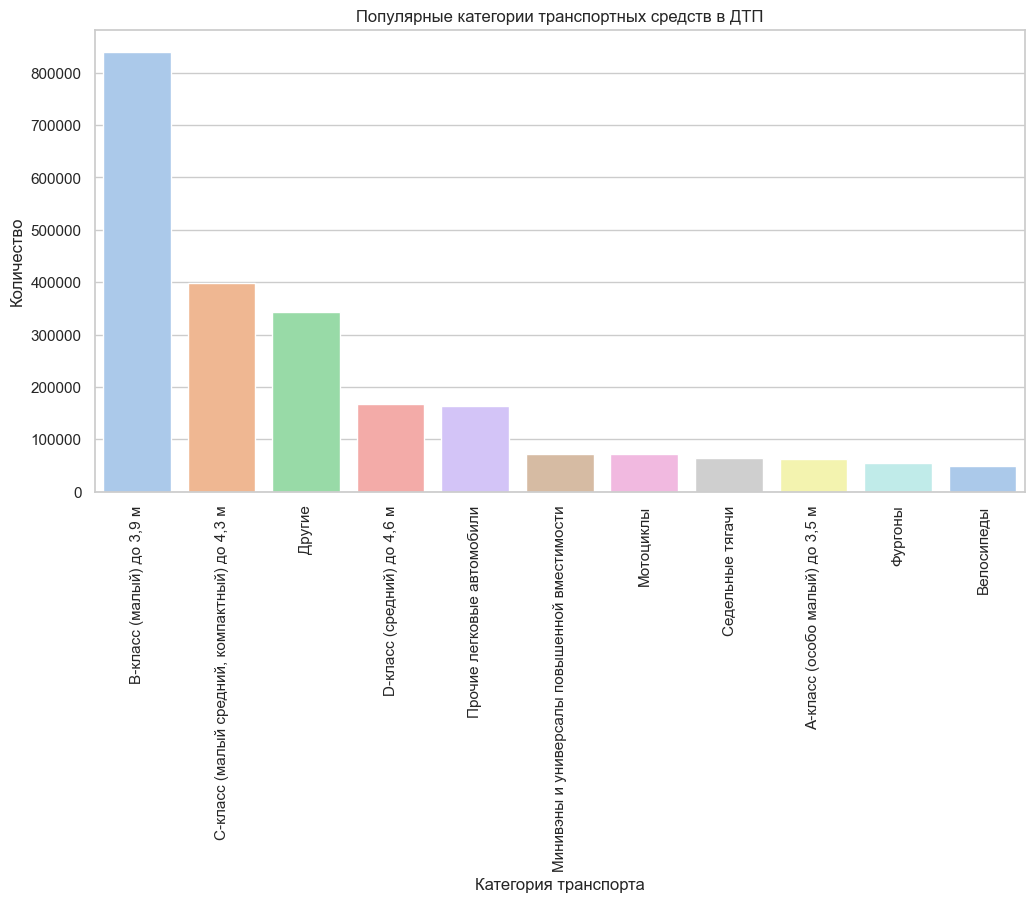

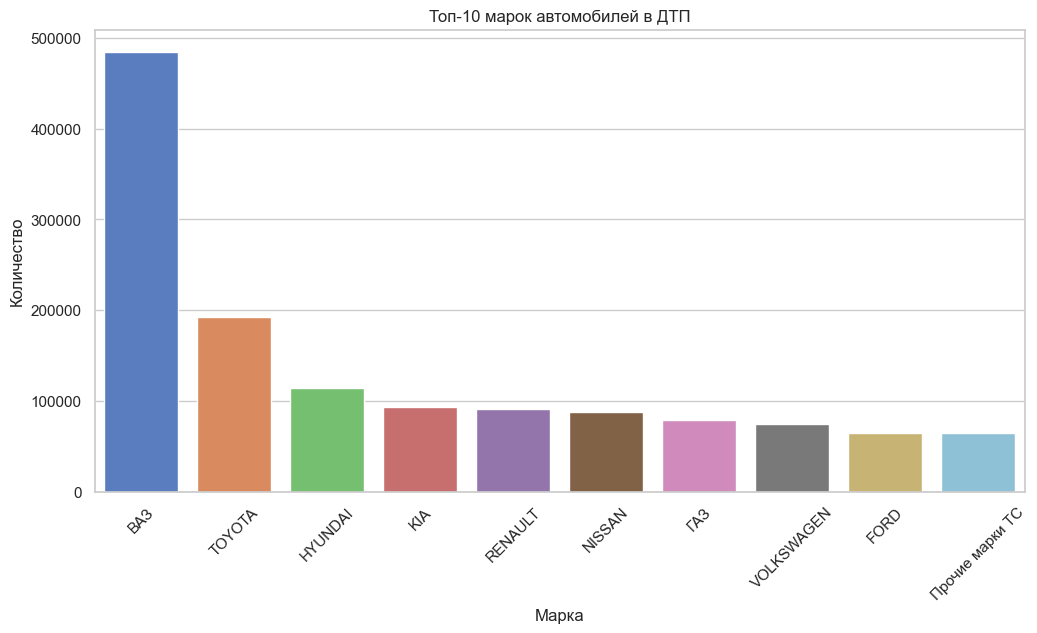

In [254]:
# Популярные категории транспортных средств
plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, x="vehicle_category", palette="pastel", order=final_df["vehicle_category"].value_counts().index)
plt.title("Популярные категории транспортных средств в ДТП")
plt.xlabel("Категория транспорта")
plt.ylabel("Количество")
plt.xticks(rotation=90)
plt.show()

# Топ-10 марок автомобилей в ДТП
plt.figure(figsize=(12, 6))
top_brands = final_df["brand"].value_counts().nlargest(10)
sns.barplot(x=top_brands.index, y=top_brands.values, palette="muted")
plt.title("Топ-10 марок автомобилей в ДТП")
plt.xlabel("Марка")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.show()

### текст ниже я написал при сдаче промеж уточного дд, на всяк случай оставлю
Графики выше дали нам пищи для ума - а именно идеи для рисерча: 
- по какой причине ВАЗ - самая частая марка, фигурирующая в дтп? Машина небезопасная? Эту марку любят безответсвенные водители? Просто ВАЗа больше всего на дорогах? 
- есть поверье, что мотоциклисты на дорогах бьются сильно чаще автомобилистов, но на диаграмме они занимают лишь 7 место по дтп. С чем это связано? В абсолютных значениях дтп мало, надо смотреть в процентном соотношении? Или это вообще ~~порошок~~ миф 
- Многие автомобилисты винят пасмурную погоду и гололед во всех проблемах, но подавляющее большинство аварий случается в ясную погоду. В чём же тут дело? Может, стоит обратить внимание именно на тяжелые и летальные последтствия для адекватного сравнения?

Вот ряд тем, которые мы намерены разузнать:
1. Что же там с этими непутевыми (или все-таки как раз-таки путёвыми) мотоцицклистами, каков их вклад в тяжелые и летальные дтп. 
2. Почему ВАЗ в топе - это прямо интересно понять. Наши ставки - их заметно больше на дороге, чем остальных марок, но наверняка всё не так просто. Посмотрим корреляция между водительским стажем и частотой&тяжестью инцидентов
3. Как влияет погода - тоже элемент исследования
### конец текста перед промеж уточным

### Время тестинга гипотез
**1. Количество участников влияет на тяжесть ДТП**
* H₀: Средняя тяжесть ДТП не зависит от количества участников.
* H₁: С увеличением количества участников ДТП тяжесть ДТП возрастает.
* Будем проверять через корелляциюонный показатель Копьемужика (Spearman) 

In [283]:
from scipy.stats import spearmanr
# Преобразуем категориальные переменные
severity_mapping = {"Легкий": 1, "Тяжёлый": 2, "С погибшими": 3}
final_df['severity_num'] = final_df['severity'].map(severity_mapping)

corr, p_value = spearmanr(final_df['participants_count'], final_df['severity_num'])
print(f"Гипотеза 1: Спирмановская корреляция = {corr:.3f}, p-value = {p_value:.3f}")

Гипотеза 1: Спирмановская корреляция = 0.029, p-value = 0.000


- C одной стороны, p-value свидетельствует о высокой статистической значимости эксперимента (и не просто номекает, а прямо орёт: отвергай нулевую гипотезу). И вроде бы мы вынуждены заявить, что взаимосвязь есть (как глаголит альтернативная гипотеза).
- он зе азер хэнд - коэф спирмана говорит, что взаимосвязь да есть положительная, но она микроскопическая 

**Будучи людьми здравомыслящими, вынуждены заключить, что чисто статистическая взаимосвязь наблюдается, но крайне небольшая**

ПЕРЕХОДЯ КО ВТОРОЙ ГИПОТЕЗЕ ПОН ЧТО НЕТ ВОЗРАСТА МАШИНЫ НА МОМЕНТ ДТП - НЕ ДЕЛО

In [287]:
final_df['accident_year'] = pd.to_datetime(final_df['datetime']).dt.year
final_df['car_age_accident'] = final_df['accident_year'] - final_df['year']


**2. Возраст автомобилей влияет на тяжесть ДТП**
* H₀: Год выпуска автомобиля не связан с тяжестью ДТП.
* H₁: ДТП с более старыми автомобилями чаще оказываются тяжелыми.
* Проверяем через ANOVA-метод для сравнения групп

In [327]:
from scipy.stats import f_oneway
anova_p_value = f_oneway(*[final_df[final_df['severity_num'] == sev]['car_age_accident'].dropna() for sev in severity_mapping.values()])[1]

print(f"Гипотеза 2: p-value ANOVA = {anova_p_value:.3f}")

Гипотеза 2: p-value ANOVA = 0.000


- Этого стоило ожидать: p-value < 0.05: ANOVA говорит нам, что различия есть, но не показывает, между какими группами:( 
- Юзанем гикки-шмикки-маус Tukey's range test:

In [299]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_tukey = final_df[['car_age_accident', 'severity']].dropna()  # Убираем строки с пропущенными значениями - чтобы уравнять количество данных в каждой из категорий
tukey = pairwise_tukeyhsd(df_tukey['car_age_accident'], df_tukey['severity'])
print(tukey)


     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj  lower   upper  reject
-------------------------------------------------------------
     Легкий С погибшими   1.1778   0.0  1.0355    1.32   True
     Легкий     Тяжёлый   0.8742   0.0  0.7856  0.9628   True
С погибшими     Тяжёлый  -0.3036   0.0 -0.4535 -0.1537   True
-------------------------------------------------------------


- Везде p-value довольно маленькие, чтобы доверять тесту. 
1. Легкий vs С погибшими
  * Разница средних = 1.1778
  * Значит, авто в ДТП с погибшими в среднем моложе на 14 месяцев, чем в легких ДТП.
2. Легкий vs Тяжёлый
* разница = 0.8742
* Авто в тяжелых ДТП в среднем младше на 10,5 месяцев, чем в легких.
3. С погибшими vs Тяжёлый
   * Разница = -0.3036
   * Машины в ДТП с погибшими немного младше(на 4 мемяца), чем в тяжелых.

- **асс ви си - возраст машин имеет статистический вклад в тяжесть ДТП, но почему-то молодые машины в среднем чаще фигурируют в более тяжелых ДТП, нежели возрастные. Современный автопром уже не тот? А вообще есть ощущение что молодым проще разогнаться и ~~по вене разбежаться~~ - но опять же упираемся в то что в датасете нет скорости.** 

**3. Дорожные условия влияют на тяжесть ДТП**
* H₀: Состояние дорожного покрытия не влияет на тяжесть ДТП.
* H₁: Плохие дорожные условия (скользкая, мокрая, заснеженная дорога) увеличивают тяжесть ДТП.
* Проверяем через хахахи-квадрат-тест

In [321]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(final_df['road_conditions'], final_df['severity'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

ddff = df = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1) # количество степенй свободы
chi2_critical = stats.chi2.ppf(0.95, ddff)
print(f"Гипотеза 3: χ² = {chi2:.3f}, p-value = {p:.3f}")

if chi2 > chi2_critical:
    print("хихи превышает критическое → отвергаем H0 (есть контакт!)")
else:
    print("хихи меньше критического → не отвергаем H0 (связи нет)")

Гипотеза 3: χ² = 63001.076, p-value = 0.000
хихи превышает критическое → отвергаем H0 (есть контакт!)


**а значит погодные условия всё же действительно херят безопасность на дороге несмотря на то, что по изначальному графику казалось, что больше всего дтп при ясности. Получается хотя бы одна гипотеза у нас подтверждена, УРА!**

4. Гиппкократ - смертность среди мотоциклистов выше 
- Как проверять будем? АшТримяСпособами:
* Простая аналитика – рассчитаем доли смертей для мотоциклистов и остальных
* zov-тест для сравнения пропорций – статистически!!! проверим разницу (3600 и 5600 с какоооой стааааати)
* хи-тест независимости – проверим, связаны ли смертность и категория транспорта 

In [330]:
moto_df = final_df[final_df['vehicle_category'] == 'Мотоциклы']
other_df = final_df[final_df['vehicle_category'] != 'Мотоциклы']

# Аналитический метод: считаем доли смертей (эффективность Анубиса)
moto_mortality_rate = moto_df['dead_count'].sum() / len(moto_df)
other_mortality_rate = other_df['dead_count'].sum() / len(other_df)

print(f"Смертность среди мотоциклистов: {moto_mortality_rate:.4f}")
print(f"Смертность среди остальных: {other_mortality_rate:.4f}")

# Z-тест для сравнения долей смертей
moto_deaths = moto_df['dead_count'].sum()
other_deaths = other_df['dead_count'].sum()
moto_total = len(moto_df)
other_total = len(other_df)

p1 = moto_deaths / moto_total
p2 = other_deaths / other_total
p = (moto_deaths + other_deaths) / (moto_total + other_total)
z_stat = (p1 - p2) / np.sqrt(p * (1 - p) * (1/moto_total + 1/other_total))
p_value = 1 - stats.norm.cdf(z_stat)  # Односторонний тест

print(f"Z-статистика: {z_stat:.4f}, p-value: {p_value:.4f}")

# хи-тест независимости
contingency_table = np.array([
    [moto_deaths, moto_total - moto_deaths],
    [other_deaths, other_total - other_deaths]
])
chi2, p_chi2, _, _ = stats.chi2_contingency(contingency_table)

print(f"Χ²-статистика: {chi2:.4f}, p-value: {p_chi2:.4f}")


Смертность среди мотоциклистов: 0.1084
Смертность среди остальных: 0.1138
Z-статистика: -4.5010, p-value: 1.0000
Χ²-статистика: 20.2046, p-value: 0.0000


1. Простая аналитика (доли смертности)
   - Смертность среди мотоциклистов: 10.84%
   - Смертность среди остальных водителей: 11.38%

На первый взгляд, смертность среди мотоциклистов даже ниже, чем среди остальных водителей. Это уже противоречит гипотезе.

2. Z-тест на разницу пропорций
   - Z-статистика: -4.5010 (отрицательное значение говорит о том, что смертность у мотоциклистов меньше, чем у остальных).
   - p-value: 1.0000 (очень высокое значение, что говорит о том, что разница не значима с точки зрения статистики).

Что это значит?
- Мы не можем отвергнуть нулевую гипотезу (что смертность у мотоциклистов не выше).
- Более того, есть статистически значимые доказательства, что смертность среди мотоциклистов даже ниже!

3. хи²-тест независимости
   - хи²-статистика: 20.2046 (довольно высокое значение, говорит о наличии сильной связи между типом транспорта и смертностью).
   - p-value: 0.0000 (очень маленькое, значит, связь между типом ТС и смертностью существует).

Что это значит?
- **Категория транспортного средства действительно влияет на вероятность смертности, но в нашем случае, мотоциклы ассоциируются с более низкой смертностью, чем другие ТС.**

## Вывод:

- **Не все гипотезы которые я увидел потенциальными на промеж уточном дедлайне я проверил (тупо не хватило времени потому что делал в одного, так что я тестил только те которые понимал че как и успевал).**
- **Из всех гипотез которые я проверил подтвердилась только влияние дорожных условий на тяжесть ДТП. Ее я нашел как раз благодаря тому что построил интерактивный график.**
- **Это было увлекательнейшее путешествие в андан.**